In [22]:
import pandas as pd
import numpy as np

In [23]:
df = pd.read_csv('updated_matches_info3.csv')
df.head()

,match_id,event,season,match_number,city,team1,team2,toss_winner,toss_decision,venue,...,total_wickets,bowled_wickets,caught_wickets,lbw_wickets,town_id,town_name,match_date,match_time,venue_long,venue_lat
0,1023581,Big Bash League,2016/17,1.0,NaN,Sydney Thunder,Sydney Sixers,Sydney Sixers,field,Sydney Showground Stadium,...,9,0,8,1,29,Sydney,2016-12-20,08:40:00,151.067490,-33.843254
1,1023583,Big Bash League,2016/17,2.0,NaN,Adelaide Strikers,Brisbane Heat,Adelaide Strikers,field,Adelaide Oval,...,11,3,8,0,2,Adelaide,2016-12-21,08:40:00,138.596039,-34.915386
2,1023585,Big Bash League,2016/17,3.0,Melbourne,Melbourne Renegades,Sydney Thunder,Sydney Thunder,field,Docklands Stadium,...,17,3,9,1,25,Melbourne,2016-12-22,08:40:00,144.947510,-37.816391
3,1023587,Big Bash League,2016/17,4.0,NaN,Sydney Sixers,Hobart Hurricanes,Sydney Sixers,field,Sydney Cricket Ground,...,17,4,9,1,29,Sydney,2016-12-23,07:10:00,151.223465,-33.891434
4,1023589,Big Bash League,2016/17,5.0,Perth,Perth Scorchers,Adelaide Strikers,Adelaide Strikers,field,Western Australia Cricket Association Ground,...,16,1,11,2,27,Perth,2016-12-23,10:15:00,115.879799,-31.959843


In [24]:
null_counts = df.isnull().sum()
print("null values in each column")
print(null_counts)

null values in each column
match_id              0
event                47
season                0
match_number       2712
city                890
team1                 0
team2                 0
toss_winner           0
toss_decision         0
venue                 0
winner              216
player_of_match    1362
venue_id              0
venue_name            0
total_runs            0
total_wickets         0
bowled_wickets        0
caught_wickets        0
lbw_wickets           0
town_id               0
town_name             0
match_date            1
match_time            0
venue_long           15
venue_lat            15
dtype: int64


In [25]:
df.drop(columns=['total_runs','total_wickets','bowled_wickets','caught_wickets','lbw_wickets'],inplace=True)
df


,match_id,event,season,match_number,city,team1,team2,toss_winner,toss_decision,venue,winner,player_of_match,venue_id,venue_name,town_id,town_name,match_date,match_time,venue_long,venue_lat
0,1023581,Big Bash League,2016/17,1.0,NaN,Sydney Thunder,Sydney Sixers,Sydney Sixers,field,Sydney Showground Stadium,Sydney Sixers,MC Henriques,2967,Sydney Showground Stadium,29,Sydney,2016-12-20,08:40:00,151.067490,-33.843254
1,1023583,Big Bash League,2016/17,2.0,NaN,Adelaide Strikers,Brisbane Heat,Adelaide Strikers,field,Adelaide Oval,Brisbane Heat,BB McCullum,131,Adelaide Oval,2,Adelaide,2016-12-21,08:40:00,138.596039,-34.915386
2,1023585,Big Bash League,2016/17,3.0,Melbourne,Melbourne Renegades,Sydney Thunder,Sydney Thunder,field,Docklands Stadium,Melbourne Renegades,AJ Finch,1177,"Docklands Stadium, Melbourne",25,Melbourne,2016-12-22,08:40:00,144.947510,-37.816391
3,1023587,Big Bash League,2016/17,4.0,NaN,Sydney Sixers,Hobart Hurricanes,Sydney Sixers,field,Sydney Cricket Ground,Hobart Hurricanes,DJM Short,132,Sydney Cricket Ground,29,Sydney,2016-12-23,07:10:00,151.223465,-33.891434
4,1023589,Big Bash League,2016/17,5.0,Perth,Perth Scorchers,Adelaide Strikers,Adelaide Strikers,field,Western Australia Cricket Association Ground,Perth Scorchers,AJ Turner,213,"Western Australia Cricket Association Ground, ...",27,Perth,2016-12-23,10:15:00,115.879799,-31.959843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7615,966763,Asia Cup,2015/16,10.0,Mirpur,Pakistan,Sri Lanka,Pakistan,field,Shere Bangla National Stadium,Pakistan,Umar Akmal,2025,"Shere Bangla National Stadium, Mirpur",58,Dhaka,2016-03-04,13:30:00,69.548860,28.022710
7616,966765,Asia Cup,2015/16,NaN,Mirpur,Bangladesh,India,India,field,Shere Bangla National Stadium,India,S Dhawan,2025,"Shere Bangla National Stadium, Mirpur",58,Dhaka,2016-03-06,13:30:00,69.548860,28.022710
7617,967081,NaN,2015/16,NaN,Dubai,United Arab Emirates,Netherlands,United Arab Emirates,field,ICC Academy,Netherlands,Mudassar Bukhari,2569,"ICC Academy, Dubai",978,Dubai,2016-02-03,09:30:00,55.227661,25.036665
7618,995467,Australia in Sri Lanka T20I Series,2016,1.0,NaN,Sri Lanka,Australia,Sri Lanka,field,Pallekele International Cricket Stadium,Australia,GJ Maxwell,2503,Pallekele International Cricket Stadium,958,Kandy,2016-09-06,13:30:00,80.722115,7.280079


In [26]:
df1 = pd.read_csv('venue_features.csv')
df1

,venue_id,venue_long,venue_lat,venue_name,matches,total_runs,total_wickets,bowled_wickets,caught_wickets,lbw_wickets
0,61,144.983490,-37.819775,Melbourne Cricket Ground,89,12573,1109,172,721,56
1,564,144.353500,-38.157318,"Simonds Stadium, South Geelong, Victoria",18,2222,225,42,150,19
2,131,138.596039,-34.915386,Adelaide Oval,90,13595,1085,211,719,76
3,1801,0.000000,0.000000,"Bready Cricket Club, Magheramason, Bready",10,1337,132,20,75,7
4,260,31.050747,-17.813900,Harare Sports Club,46,6245,565,110,353,38
...,...,...,...,...,...,...,...,...,...,...
287,2116,0.000000,0.000000,"Radlett Cricket Club, Radlett",8,1345,103,16,73,4
288,235,NaN,NaN,"Stanley Park, Blackpool",3,397,32,1,25,2
289,2036,0.000000,0.000000,"Merchant Taylors' School Ground, Northwood",4,703,51,8,31,2
290,287,NaN,NaN,"Castle Park Cricket Ground, Colchester",1,172,16,2,12,0


In [27]:
df1.isna().sum()


venue_id           0
venue_long        35
venue_lat         35
venue_name         0
matches            0
total_runs         0
total_wickets      0
bowled_wickets     0
caught_wickets     0
lbw_wickets        0
dtype: int64

In [28]:
df1_selected = df1[['venue_id','matches','total_runs','total_wickets','bowled_wickets','caught_wickets','lbw_wickets']]
_df_ = df.join(df1_selected.set_index('venue_id'),on='venue_id')
_df_

,match_id,event,season,match_number,city,team1,team2,toss_winner,toss_decision,venue,...,match_date,match_time,venue_long,venue_lat,matches,total_runs,total_wickets,bowled_wickets,caught_wickets,lbw_wickets
0,1023581,Big Bash League,2016/17,1.0,NaN,Sydney Thunder,Sydney Sixers,Sydney Sixers,field,Sydney Showground Stadium,...,2016-12-20,08:40:00,151.067490,-33.843254,37,4826,441,80,285,34
1,1023583,Big Bash League,2016/17,2.0,NaN,Adelaide Strikers,Brisbane Heat,Adelaide Strikers,field,Adelaide Oval,...,2016-12-21,08:40:00,138.596039,-34.915386,90,13595,1085,211,719,76
2,1023585,Big Bash League,2016/17,3.0,Melbourne,Melbourne Renegades,Sydney Thunder,Sydney Thunder,field,Docklands Stadium,...,2016-12-22,08:40:00,144.947510,-37.816391,69,10067,853,151,556,52
3,1023587,Big Bash League,2016/17,4.0,NaN,Sydney Sixers,Hobart Hurricanes,Sydney Sixers,field,Sydney Cricket Ground,...,2016-12-23,07:10:00,151.223465,-33.891434,83,11551,1025,179,667,60
4,1023589,Big Bash League,2016/17,5.0,Perth,Perth Scorchers,Adelaide Strikers,Adelaide Strikers,field,Western Australia Cricket Association Ground,...,2016-12-23,10:15:00,115.879799,-31.959843,36,5046,421,60,284,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7615,966763,Asia Cup,2015/16,10.0,Mirpur,Pakistan,Sri Lanka,Pakistan,field,Shere Bangla National Stadium,...,2016-03-04,13:30:00,69.548860,28.022710,318,42836,4171,737,2442,321
7616,966765,Asia Cup,2015/16,NaN,Mirpur,Bangladesh,India,India,field,Shere Bangla National Stadium,...,2016-03-06,13:30:00,69.548860,28.022710,318,42836,4171,737,2442,321
7617,967081,NaN,2015/16,NaN,Dubai,United Arab Emirates,Netherlands,United Arab Emirates,field,ICC Academy,...,2016-02-03,09:30:00,55.227661,25.036665,47,5941,621,107,396,54
7618,995467,Australia in Sri Lanka T20I Series,2016,1.0,NaN,Sri Lanka,Australia,Sri Lanka,field,Pallekele International Cricket Stadium,...,2016-09-06,13:30:00,80.722115,7.280079,26,3889,328,81,173,33


In [29]:
_df_.isna().sum()
df = _df_.copy()
df

,match_id,event,season,match_number,city,team1,team2,toss_winner,toss_decision,venue,...,match_date,match_time,venue_long,venue_lat,matches,total_runs,total_wickets,bowled_wickets,caught_wickets,lbw_wickets
0,1023581,Big Bash League,2016/17,1.0,NaN,Sydney Thunder,Sydney Sixers,Sydney Sixers,field,Sydney Showground Stadium,...,2016-12-20,08:40:00,151.067490,-33.843254,37,4826,441,80,285,34
1,1023583,Big Bash League,2016/17,2.0,NaN,Adelaide Strikers,Brisbane Heat,Adelaide Strikers,field,Adelaide Oval,...,2016-12-21,08:40:00,138.596039,-34.915386,90,13595,1085,211,719,76
2,1023585,Big Bash League,2016/17,3.0,Melbourne,Melbourne Renegades,Sydney Thunder,Sydney Thunder,field,Docklands Stadium,...,2016-12-22,08:40:00,144.947510,-37.816391,69,10067,853,151,556,52
3,1023587,Big Bash League,2016/17,4.0,NaN,Sydney Sixers,Hobart Hurricanes,Sydney Sixers,field,Sydney Cricket Ground,...,2016-12-23,07:10:00,151.223465,-33.891434,83,11551,1025,179,667,60
4,1023589,Big Bash League,2016/17,5.0,Perth,Perth Scorchers,Adelaide Strikers,Adelaide Strikers,field,Western Australia Cricket Association Ground,...,2016-12-23,10:15:00,115.879799,-31.959843,36,5046,421,60,284,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7615,966763,Asia Cup,2015/16,10.0,Mirpur,Pakistan,Sri Lanka,Pakistan,field,Shere Bangla National Stadium,...,2016-03-04,13:30:00,69.548860,28.022710,318,42836,4171,737,2442,321
7616,966765,Asia Cup,2015/16,NaN,Mirpur,Bangladesh,India,India,field,Shere Bangla National Stadium,...,2016-03-06,13:30:00,69.548860,28.022710,318,42836,4171,737,2442,321
7617,967081,NaN,2015/16,NaN,Dubai,United Arab Emirates,Netherlands,United Arab Emirates,field,ICC Academy,...,2016-02-03,09:30:00,55.227661,25.036665,47,5941,621,107,396,54
7618,995467,Australia in Sri Lanka T20I Series,2016,1.0,NaN,Sri Lanka,Australia,Sri Lanka,field,Pallekele International Cricket Stadium,...,2016-09-06,13:30:00,80.722115,7.280079,26,3889,328,81,173,33


In [30]:
df.isna().sum()

match_id              0
event                47
season                0
match_number       2712
city                890
team1                 0
team2                 0
toss_winner           0
toss_decision         0
venue                 0
winner              216
player_of_match    1362
venue_id              0
venue_name            0
town_id               0
town_name             0
match_date            1
match_time            0
venue_long           15
venue_lat            15
matches               0
total_runs            0
total_wickets         0
bowled_wickets        0
caught_wickets        0
lbw_wickets           0
dtype: int64

winner nan --> no result we can give 0.5 to both team.<br>
for now we are omiting the column man0fThematch<br>
for the missing values in the match_number -> fill_max ->high priority matches<br>
what about the 15 matches with na lat / long....

vanue_features ->analysis

In [31]:
df2 = pd.read_csv('weather.csv')
df2

,match_id,match_date,latitude,longitude,daily_apparent_temperature_mean,hourly_relative_humidity_2m,hourly_apparent_temperature,hourly_precipitation,hourly_is_day,hourly_temperature_2m_spread,hourly_temperature_2m
0,1023581,2016-12-20,-33.843254,151.067490,26.195353,59.654545,26.195349,0.0,0.625000,NaN,24.989084
1,1023583,2016-12-21,-34.915386,138.596039,16.551050,62.494720,16.551046,0.0,0.583333,NaN,18.496248
2,1023585,2016-12-22,-37.816391,144.947510,15.977874,73.556390,15.977874,0.0,0.625000,NaN,16.626500
3,1023587,2016-12-23,-33.891434,151.223465,22.275576,75.893060,22.275580,0.1,0.625000,NaN,21.316750
4,1023589,2016-12-23,-31.959843,115.879799,23.522377,47.163574,23.522375,0.0,0.583333,NaN,25.248833
...,...,...,...,...,...,...,...,...,...,...,...
7321,966763,2016-03-04,28.022710,69.548860,21.952951,71.801544,21.952951,5.0,0.500000,NaN,20.971918
7322,966765,2016-03-06,28.022710,69.548860,20.200476,59.184086,20.200474,0.0,0.500000,NaN,21.101084
7323,967081,2016-02-03,25.036665,55.227661,16.400684,68.792210,16.400682,0.0,0.458333,NaN,17.424500
7324,995467,2016-09-06,7.280079,80.722115,26.913496,77.816590,26.913498,0.3,0.500000,NaN,24.114916


In [32]:
null_counts = df2.isnull().sum()
print("null values in each column")
print(null_counts)

null values in each column
match_id                              0
match_date                            0
latitude                              0
longitude                             0
daily_apparent_temperature_mean       0
hourly_relative_humidity_2m           0
hourly_apparent_temperature           0
hourly_precipitation                  0
hourly_is_day                         0
hourly_temperature_2m_spread       7326
hourly_temperature_2m                 0
dtype: int64


need to drop hourly_temperature_2m_spread - column na<br>
match_id maps perfectly<br>

In [33]:
df2.drop(columns=['hourly_temperature_2m_spread','latitude','longitude','match_date'],inplace=True)
df = df.drop(columns=['event','season','city','venue','venue_id','player_of_match','town_id','town_name','match_date','match_time'])
df.columns

Index(['match_id', 'match_number', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'winner', 'venue_name', 'venue_long', 'venue_lat',
       'matches', 'total_runs', 'total_wickets', 'bowled_wickets',
       'caught_wickets', 'lbw_wickets'],
      dtype='object')

In [34]:
df = df.join(df2.set_index('match_id'),on='match_id')
df.head()

,match_id,match_number,team1,team2,toss_winner,toss_decision,winner,venue_name,venue_long,venue_lat,...,total_wickets,bowled_wickets,caught_wickets,lbw_wickets,daily_apparent_temperature_mean,hourly_relative_humidity_2m,hourly_apparent_temperature,hourly_precipitation,hourly_is_day,hourly_temperature_2m
0,1023581,1.0,Sydney Thunder,Sydney Sixers,Sydney Sixers,field,Sydney Sixers,Sydney Showground Stadium,151.067490,-33.843254,...,441,80,285,34,26.195353,59.654545,26.195349,0.0,0.625000,24.989084
1,1023583,2.0,Adelaide Strikers,Brisbane Heat,Adelaide Strikers,field,Brisbane Heat,Adelaide Oval,138.596039,-34.915386,...,1085,211,719,76,16.551050,62.494720,16.551046,0.0,0.583333,18.496248
2,1023585,3.0,Melbourne Renegades,Sydney Thunder,Sydney Thunder,field,Melbourne Renegades,"Docklands Stadium, Melbourne",144.947510,-37.816391,...,853,151,556,52,15.977874,73.556390,15.977874,0.0,0.625000,16.626500
3,1023587,4.0,Sydney Sixers,Hobart Hurricanes,Sydney Sixers,field,Hobart Hurricanes,Sydney Cricket Ground,151.223465,-33.891434,...,1025,179,667,60,22.275576,75.893060,22.275580,0.1,0.625000,21.316750
4,1023589,5.0,Perth Scorchers,Adelaide Strikers,Adelaide Strikers,field,Perth Scorchers,"Western Australia Cricket Association Ground, ...",115.879799,-31.959843,...,421,60,284,18,23.522377,47.163574,23.522375,0.0,0.583333,25.248833


In [35]:
null_counts = df.isnull().sum()
print("null values in each column")
print(null_counts)

null values in each column
match_id                              0
match_number                       2712
team1                                 0
team2                                 0
toss_winner                           0
toss_decision                         0
winner                              216
venue_name                            0
venue_long                           15
venue_lat                            15
matches                               0
total_runs                            0
total_wickets                         0
bowled_wickets                        0
caught_wickets                        0
lbw_wickets                           0
daily_apparent_temperature_mean     294
hourly_relative_humidity_2m         294
hourly_apparent_temperature         294
hourly_precipitation                294
hourly_is_day                       294
hourly_temperature_2m               294
dtype: int64


In [36]:
df3 = df[df['hourly_apparent_temperature'].isna()]

In [37]:
from sklearn.cluster import KMeans

# Assuming df is your DataFrame
# List of columns to impute using clustering
cols_to_impute = [
    'daily_apparent_temperature_mean',
    'hourly_relative_humidity_2m',
    'hourly_apparent_temperature',
    'hourly_precipitation',
    'hourly_is_day',
    'hourly_temperature_2m'
]
max_match = df['match_number'].max()
df['match_number'] = df['match_number'].fillna(max_match)

mask_coords = df['venue_long'].notnull() & df['venue_lat'].notnull()
df_coords = df[mask_coords].copy()

n_cluster = 5
kmeans = KMeans(n_clusters=n_cluster,random_state=42)
df_coords['cluster'] = kmeans.fit_predict(df_coords[['venue_long', 'venue_lat']])
for col in cols_to_impute:
    for cluster in df_coords['cluster'].unique():
        cluster_mask = df_coords['cluster'] == cluster
        cluster_mean = df_coords.loc[cluster_mask, col].mean()
        idx = df_coords.loc[cluster_mask & df_coords[col].isnull()].index
        df.loc[idx, col] = cluster_mean
        
        
for col in cols_to_impute:
    if df[col].isnull().sum() > 0:
        global_mean = df[col].mean()
        df[col] = df[col].fillna(global_mean)
        

print(df.isnull().sum())

match_id                             0
match_number                         0
team1                                0
team2                                0
toss_winner                          0
toss_decision                        0
winner                             216
venue_name                           0
venue_long                          15
venue_lat                           15
matches                              0
total_runs                           0
total_wickets                        0
bowled_wickets                       0
caught_wickets                       0
lbw_wickets                          0
daily_apparent_temperature_mean      0
hourly_relative_humidity_2m          0
hourly_apparent_temperature          0
hourly_precipitation                 0
hourly_is_day                        0
hourly_temperature_2m                0
dtype: int64


In [38]:
from sklearn.preprocessing import MinMaxScaler
numeric_cols =['match_number','matches','total_runs','total_wickets','bowled_wickets','caught_wickets','lbw_wickets',
    'daily_apparent_temperature_mean',
    'hourly_relative_humidity_2m',
    'hourly_apparent_temperature',
    'hourly_precipitation',
    'hourly_is_day',
    'hourly_temperature_2m']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])
df_scaled.head()


,match_id,match_number,team1,team2,toss_winner,toss_decision,winner,venue_name,venue_long,venue_lat,...,total_wickets,bowled_wickets,caught_wickets,lbw_wickets,daily_apparent_temperature_mean,hourly_relative_humidity_2m,hourly_apparent_temperature,hourly_precipitation,hourly_is_day,hourly_temperature_2m
0,1023581,0.000000,Sydney Thunder,Sydney Sixers,Sydney Sixers,field,Sydney Sixers,Sydney Showground Stadium,151.067490,-33.843254,...,0.104442,0.107337,0.115258,0.105919,0.739342,0.593296,0.739342,0.000000,0.555556,0.711281
1,1023583,0.014085,Adelaide Strikers,Brisbane Heat,Adelaide Strikers,field,Brisbane Heat,Adelaide Oval,138.596039,-34.915386,...,0.259064,0.285326,0.293273,0.236760,0.552276,0.624852,0.552276,0.000000,0.444444,0.567054
2,1023585,0.028169,Melbourne Renegades,Sydney Thunder,Sydney Thunder,field,Melbourne Renegades,"Docklands Stadium, Melbourne",144.947510,-37.816391,...,0.203361,0.203804,0.226415,0.161994,0.541159,0.747751,0.541159,0.000000,0.555556,0.525521
3,1023587,0.042254,Sydney Sixers,Hobart Hurricanes,Sydney Sixers,field,Hobart Hurricanes,Sydney Cricket Ground,151.223465,-33.891434,...,0.244658,0.241848,0.271944,0.186916,0.663312,0.773713,0.663312,0.001504,0.555556,0.629706
4,1023589,0.056338,Perth Scorchers,Adelaide Strikers,Adelaide Strikers,field,Perth Scorchers,"Western Australia Cricket Association Ground, ...",115.879799,-31.959843,...,0.099640,0.080163,0.114848,0.056075,0.687495,0.454516,0.687495,0.000000,0.444444,0.717050


In [39]:
selected_features = ['player_id',]

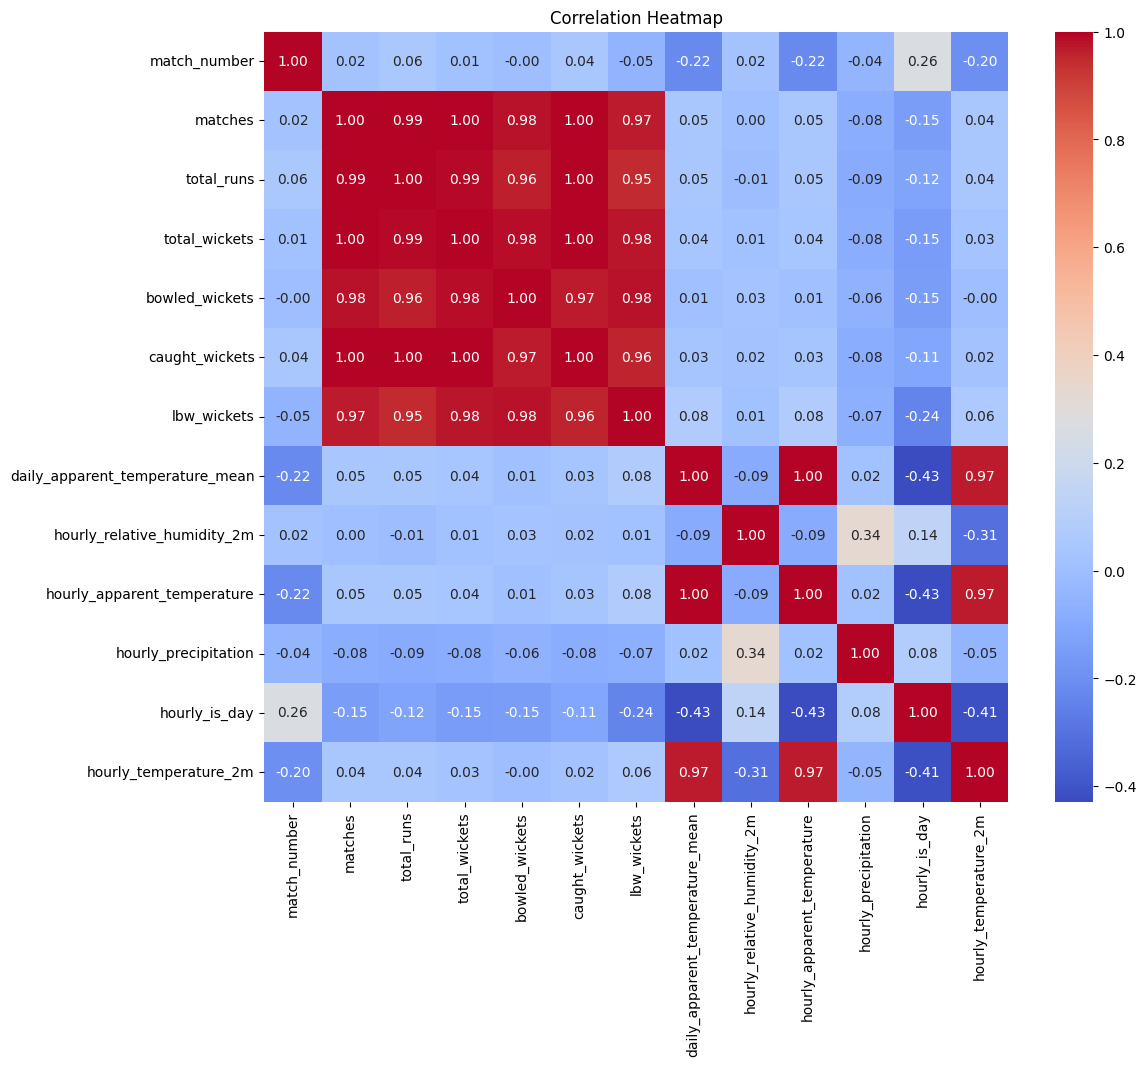

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [41]:
df_scaled.columns

Index(['match_id', 'match_number', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'winner', 'venue_name', 'venue_long', 'venue_lat',
       'matches', 'total_runs', 'total_wickets', 'bowled_wickets',
       'caught_wickets', 'lbw_wickets', 'daily_apparent_temperature_mean',
       'hourly_relative_humidity_2m', 'hourly_apparent_temperature',
       'hourly_precipitation', 'hourly_is_day', 'hourly_temperature_2m'],
      dtype='object')

In [42]:
df_scaled.drop(columns=['venue_name','venue_lat','venue_long'],inplace=True)
df_scaled.to_csv('cleaned_matchinfo_without_venue.csv',index=False)
print("\nCleaned data saved to 'cleaned_data_without_Venue.csv'")


Cleaned data saved to 'cleaned_data_without_Venue.csv'


Checkpoint for cleaned_matchinfo.csv<br>
need to append the historical features of the venue

In [169]:
df4 = pd.read_csv('venue_features.csv')
df4

,venue_id,venue_long,venue_lat,venue_name,matches,total_runs,total_wickets,bowled_wickets,caught_wickets,lbw_wickets
0,61,144.983490,-37.819775,Melbourne Cricket Ground,89,12573,1109,172,721,56
1,564,144.353500,-38.157318,"Simonds Stadium, South Geelong, Victoria",18,2222,225,42,150,19
2,131,138.596039,-34.915386,Adelaide Oval,90,13595,1085,211,719,76
3,1801,0.000000,0.000000,"Bready Cricket Club, Magheramason, Bready",10,1337,132,20,75,7
4,260,31.050747,-17.813900,Harare Sports Club,46,6245,565,110,353,38
...,...,...,...,...,...,...,...,...,...,...
287,2116,0.000000,0.000000,"Radlett Cricket Club, Radlett",8,1345,103,16,73,4
288,235,NaN,NaN,"Stanley Park, Blackpool",3,397,32,1,25,2
289,2036,0.000000,0.000000,"Merchant Taylors' School Ground, Northwood",4,703,51,8,31,2
290,287,NaN,NaN,"Castle Park Cricket Ground, Colchester",1,172,16,2,12,0


In [174]:
_df = pd.read_csv('updated_matches_info3.csv')
_df



,match_id,event,season,match_number,city,team1,team2,toss_winner,toss_decision,venue,...,total_wickets,bowled_wickets,caught_wickets,lbw_wickets,town_id,town_name,match_date,match_time,venue_long,venue_lat
0,1023581,Big Bash League,2016/17,1.0,NaN,Sydney Thunder,Sydney Sixers,Sydney Sixers,field,Sydney Showground Stadium,...,9,0,8,1,29,Sydney,2016-12-20,08:40:00,151.067490,-33.843254
1,1023583,Big Bash League,2016/17,2.0,NaN,Adelaide Strikers,Brisbane Heat,Adelaide Strikers,field,Adelaide Oval,...,11,3,8,0,2,Adelaide,2016-12-21,08:40:00,138.596039,-34.915386
2,1023585,Big Bash League,2016/17,3.0,Melbourne,Melbourne Renegades,Sydney Thunder,Sydney Thunder,field,Docklands Stadium,...,17,3,9,1,25,Melbourne,2016-12-22,08:40:00,144.947510,-37.816391
3,1023587,Big Bash League,2016/17,4.0,NaN,Sydney Sixers,Hobart Hurricanes,Sydney Sixers,field,Sydney Cricket Ground,...,17,4,9,1,29,Sydney,2016-12-23,07:10:00,151.223465,-33.891434
4,1023589,Big Bash League,2016/17,5.0,Perth,Perth Scorchers,Adelaide Strikers,Adelaide Strikers,field,Western Australia Cricket Association Ground,...,16,1,11,2,27,Perth,2016-12-23,10:15:00,115.879799,-31.959843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7615,966763,Asia Cup,2015/16,10.0,Mirpur,Pakistan,Sri Lanka,Pakistan,field,Shere Bangla National Stadium,...,8,2,5,1,58,Dhaka,2016-03-04,13:30:00,69.548860,28.022710
7616,966765,Asia Cup,2015/16,NaN,Mirpur,Bangladesh,India,India,field,Shere Bangla National Stadium,...,7,0,5,1,58,Dhaka,2016-03-06,13:30:00,69.548860,28.022710
7617,967081,NaN,2015/16,NaN,Dubai,United Arab Emirates,Netherlands,United Arab Emirates,field,ICC Academy,...,15,1,11,2,978,Dubai,2016-02-03,09:30:00,55.227661,25.036665
7618,995467,Australia in Sri Lanka T20I Series,2016,1.0,NaN,Sri Lanka,Australia,Sri Lanka,field,Pallekele International Cricket Stadium,...,12,3,9,0,958,Kandy,2016-09-06,13:30:00,80.722115,7.280079


In [177]:
_df3 = _df[['match_id','venue_id','venue_name','venue_lat','venue_long']]
_df3

,match_id,venue_id,venue_name,venue_lat,venue_long
0,1023581,2967,Sydney Showground Stadium,-33.843254,151.067490
1,1023583,131,Adelaide Oval,-34.915386,138.596039
2,1023585,1177,"Docklands Stadium, Melbourne",-37.816391,144.947510
3,1023587,132,Sydney Cricket Ground,-33.891434,151.223465
4,1023589,213,"Western Australia Cricket Association Ground, ...",-31.959843,115.879799
...,...,...,...,...,...
7615,966763,2025,"Shere Bangla National Stadium, Mirpur",28.022710,69.548860
7616,966765,2025,"Shere Bangla National Stadium, Mirpur",28.022710,69.548860
7617,967081,2569,"ICC Academy, Dubai",25.036665,55.227661
7618,995467,2503,Pallekele International Cricket Stadium,7.280079,80.722115


In [179]:
_df3.isna().sum()

match_id       0
venue_id       0
venue_name     0
venue_lat     15
venue_long    15
dtype: int64

In [181]:
_venue_features_df = pd.read_csv('venue_features.csv')
_venue_features_df.isna().sum()

venue_id           0
venue_long        35
venue_lat         35
venue_name         0
matches            0
total_runs         0
total_wickets      0
bowled_wickets     0
caught_wickets     0
lbw_wickets        0
dtype: int64

In [183]:
selected_columns = ['venue_id', 'matches', 'total_runs','total_wickets','bowled_wickets','caught_wickets','lbw_wickets']
venue_subset = _venue_features_df[selected_columns]
_df3 = _df3.join(venue_subset.set_index('venue_id'),on = 'venue_id')
_df3 


,match_id,venue_id,venue_name,venue_lat,venue_long,matches,total_runs,total_wickets,bowled_wickets,caught_wickets,lbw_wickets
0,1023581,2967,Sydney Showground Stadium,-33.843254,151.067490,37,4826,441,80,285,34
1,1023583,131,Adelaide Oval,-34.915386,138.596039,90,13595,1085,211,719,76
2,1023585,1177,"Docklands Stadium, Melbourne",-37.816391,144.947510,69,10067,853,151,556,52
3,1023587,132,Sydney Cricket Ground,-33.891434,151.223465,83,11551,1025,179,667,60
4,1023589,213,"Western Australia Cricket Association Ground, ...",-31.959843,115.879799,36,5046,421,60,284,18
...,...,...,...,...,...,...,...,...,...,...,...
7615,966763,2025,"Shere Bangla National Stadium, Mirpur",28.022710,69.548860,318,42836,4171,737,2442,321
7616,966765,2025,"Shere Bangla National Stadium, Mirpur",28.022710,69.548860,318,42836,4171,737,2442,321
7617,967081,2569,"ICC Academy, Dubai",25.036665,55.227661,47,5941,621,107,396,54
7618,995467,2503,Pallekele International Cricket Stadium,7.280079,80.722115,26,3889,328,81,173,33


In [184]:
_df3.isna().sum()

match_id           0
venue_id           0
venue_name         0
venue_lat         15
venue_long        15
matches            0
total_runs         0
total_wickets      0
bowled_wickets     0
caught_wickets     0
lbw_wickets        0
dtype: int64

In [185]:
_df3.to_csv('match_venue_historical_included.csv')
print("\nCleaned data saved to 'match_venue_historical_included.csv'")


Cleaned data saved to 'match_venue_historical_included.csv'


Historical_venue mapped to the match_id <br>
->we can pass the historical features of a venue instead of a particular mathches itself<br>
-> though i think, passing both doesn't hurt (wait why we want to pass for a particular match itself.)

In [186]:
import pandas as pd

work -> SquadPlayerName_mapping<br>

In [193]:
mapped_player_df = pd.read_csv(r'C:\Users\kumar\IPL_Fantasy_Score_Prediction\tests\mapped player data.csv')
mapped_player_df

,Credits,Player Type,Player Name,Team,key_cricinfo
0,5.0,WK,Vansh Bedi,CHE,1413379
1,5.5,BAT,Andre Siddharth,CHE,1440190
2,5.5,ALL,Ramakrishna Ghosh,CHE,1339053
3,5.0,BAT,Shaik Rasheed,CHE,1292497
4,6.0,BOWL,Gurjapneet Singh,CHE,1269869
...,...,...,...,...,...
223,7.5,BOWL,Adam Zampa,SRH,379504
224,8.0,BOWL,Harshal Patel,SRH,390481
225,8.5,BOWL,Pat Cummins,SRH,489889
226,8.5,BOWL,Mohammed Shami,SRH,481896


In [201]:
player_id_map = pd.read_csv(r'C:\Users\kumar\IPL_Fantasy_Score_Prediction\tests\player_id_mapping.csv')
selected_columns = ['identifier','unique_name','key_cricinfo']
player_id_map_subset = pd.DataFrame(player_id_map[selected_columns])
player_id_map_subset

,identifier,unique_name,key_cricinfo
0,b4a23876,AAA Amsterdam,772407.0
1,482762af,AA Adeoye,380588.0
2,4b0e3049,AA Alleyne,661441.0
3,fd3c5c00,AAA Patel,1163136.0
4,bc005f0d,AAA White,474307.0
...,...,...,...
16133,ee9bdbc8,Zulqarnain Haider,43860.0
16134,2d46e8ed,Zulqarnain Haider (2),1046641.0
16135,b71670a0,Zulufat Mutoniwase,1380564.0
16136,d35c1fc7,Zumika Azmi,1050037.0


In [202]:
mapped_player_df = mapped_player_df.join(player_id_map_subset.set_index('key_cricinfo'),on='key_cricinfo')
mapped_player_df


,Credits,Player Type,Player Name,Team,key_cricinfo,identifier,unique_name
0,5.0,WK,Vansh Bedi,CHE,1413379,NaN,NaN
1,5.5,BAT,Andre Siddharth,CHE,1440190,NaN,NaN
2,5.5,ALL,Ramakrishna Ghosh,CHE,1339053,NaN,NaN
3,5.0,BAT,Shaik Rasheed,CHE,1292497,cbf58a86,SK Rasheed
4,6.0,BOWL,Gurjapneet Singh,CHE,1269869,NaN,NaN
...,...,...,...,...,...,...,...
223,7.5,BOWL,Adam Zampa,SRH,379504,14f96089,A Zampa
224,8.0,BOWL,Harshal Patel,SRH,390481,f986ca1a,HV Patel
225,8.5,BOWL,Pat Cummins,SRH,489889,ded9240e,PJ Cummins
226,8.5,BOWL,Mohammed Shami,SRH,481896,8cf9814c,Mohammed Shami


In [203]:
mapped_player_df.isna().sum()

Credits          0
Player Type      0
Player Name      0
Team             0
key_cricinfo     0
identifier      17
unique_name     17
dtype: int64

In [205]:
mapped_player_df[mapped_player_df['unique_name'].isna()]

,Credits,Player Type,Player Name,Team,key_cricinfo,identifier,unique_name
0,5.0,WK,Vansh Bedi,CHE,1413379,NaN,NaN
1,5.5,BAT,Andre Siddharth,CHE,1440190,NaN,NaN
2,5.5,ALL,Ramakrishna Ghosh,CHE,1339053,NaN,NaN
4,6.0,BOWL,Gurjapneet Singh,CHE,1269869,NaN,NaN
25,5.0,ALL,Madhav Tiwari,DC,1460385,NaN,NaN
26,5.5,ALL,Manvanth Kumar L,DC,1392186,NaN,NaN
94,5.0,BOWL,Digvesh Singh,LSG,1460529,NaN,NaN
120,5.5,WK,Robin Minz,MI,1350762,NaN,NaN
122,5.0,BOWL,Vignesh Puthur,MI,1460388,NaN,NaN
123,5.5,ALL,Satyanarayana Raju,MI,1392201,NaN,NaN


Asuming that these player will not play in the ipl 25<br>

In [206]:
mapped_player_df.to_csv('mapping_SquadPlayerName_IndianT20League.csv')

In [209]:
dfIPl25_player = mapped_player_df.dropna()
dfIPl25_player.drop(columns=['key_cricinfo','unique_name'],inplace=True)
dfIPl25_player



C:\Users\kumar\AppData\Local\Temp\ipykernel_3912\484439681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfIPl25_player.drop(columns=['key_cricinfo','unique_name'],inplace=True)


,Credits,Player Type,Player Name,Team,identifier
3,5.0,BAT,Shaik Rasheed,CHE,cbf58a86
5,8.5,BOWL,Matheesha Pathirana,CHE,64839cb3
6,7.5,BOWL,Noor Ahmad,CHE,efc04be7
7,6.0,BOWL,Anshul Kamboj,CHE,fcc21ace
8,7.0,BOWL,Nathan Ellis,CHE,9eb1455b
...,...,...,...,...,...
223,7.5,BOWL,Adam Zampa,SRH,14f96089
224,8.0,BOWL,Harshal Patel,SRH,f986ca1a
225,8.5,BOWL,Pat Cummins,SRH,ded9240e
226,8.5,BOWL,Mohammed Shami,SRH,8cf9814c


In [210]:
dfIPl25_player.to_csv('Mapping_Unique_SquadPlayerName_IndianT20League.csv')

In [212]:
# df_updated_missing = pd.read_csv('updated_missing_coordinates.csv')
# df_updated_missing.isna().sum()

Day-2

In [51]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import os
scaler = MinMaxScaler()

In [53]:
numeric_cols = ['batting_position','runs',"balls","fours","sixes","strike_rate","overs","total_balls","dots","maidens","conceded","fours_conceded","sixes_conceded","wickets","LBW","Bowled","noballs","wides","economy_rate","catches","stumping","direct_hit","indirect_hit"]
input_folder = r'C:\Users\kumar\IPL_Fantasy_Score_Prediction\Ashu\GlobalMatchrecords'
output_folder = r'C:\Users\kumar\IPL_Fantasy_Score_Prediction\Ashu\Test_1\processed_GlobalMatchrecords'
for file in os.listdir(input_folder):
    if file.endswith('.csv'):
        output_file = os.path.join(output_folder,file)
        file_path = os.path.join(input_folder,file)
        df = pd.read_csv(file_path)
        df.drop(columns=['name','overs_bowled'],inplace=True)
        df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
        df.to_csv(output_file)
        print(f"Written CSV for player {file} to {output_file}")
        
    





Written CSV for player 1001349.csv to C:\Users\kumar\IPL_Fantasy_Score_Prediction\Ashu\Test_1\processed_GlobalMatchrecords\1001349.csv
Written CSV for player 1001351.csv to C:\Users\kumar\IPL_Fantasy_Score_Prediction\Ashu\Test_1\processed_GlobalMatchrecords\1001351.csv
Written CSV for player 1001353.csv to C:\Users\kumar\IPL_Fantasy_Score_Prediction\Ashu\Test_1\processed_GlobalMatchrecords\1001353.csv
Written CSV for player 1003843.csv to C:\Users\kumar\IPL_Fantasy_Score_Prediction\Ashu\Test_1\processed_GlobalMatchrecords\1003843.csv
Written CSV for player 1003845.csv to C:\Users\kumar\IPL_Fantasy_Score_Prediction\Ashu\Test_1\processed_GlobalMatchrecords\1003845.csv
Written CSV for player 1003847.csv to C:\Users\kumar\IPL_Fantasy_Score_Prediction\Ashu\Test_1\processed_GlobalMatchrecords\1003847.csv
Written CSV for player 1003849.csv to C:\Users\kumar\IPL_Fantasy_Score_Prediction\Ashu\Test_1\processed_GlobalMatchrecords\1003849.csv
Written CSV for player 1003855.csv to C:\Users\kumar\IP